# QUIZ 5 - Object Recognition: BoF vs ConvNetsTarefa

### Grupo: Luiz Gontijo, Marcos Vinicius, Matheus Pimenta

O objetivo deste Quiz é implementar e comparar duas maneiras de reconhecimento de objetos. 

In [1]:
import numpy as np
import pickle
import cv2 as cv
from matplotlib import pyplot as plt
import scipy.misc as smp

In [2]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
batch1 = unpickle("./cifar-10-python/cifar-10-batches-py/data_batch_1")
# for key in batch1:
#     print(key, '->', batch1[key])



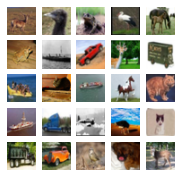

In [4]:
X = batch1[b"data"] 
Y = batch1[b'labels']
X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")

#Visualizing CIFAR 10
fig, axes1 = plt.subplots(5,5,figsize=(3,3))
for j in range(5):
    for k in range(5):
        i = np.random.choice(range(len(X)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(X[i:i+1][0])


### Bag of Features

1. Dataset aleatório
2. SIFT pra cada uma das imagens
3. Comparar descritores do SIFT e separar em grupos (clusters)
4. Criar um representante para cada grupo (média do grupo)
5. Classificar todas as imagens (data e label)
    data = [[1,2,3],[1,3,5],...] | label = [0,1,2,...]
6. Passar pros modelos de aprendizado


⚫ It is composed of 4 steps
    1. Feature Extraction
    2. Visual Dictionary Creation
    3. Vector Quantization
    4. Image Representation

In [5]:
def get_SIFT_desc(img):
    sift = cv.SIFT_create()
    keypoints = sift.detect(img,None)
    k, d = sift.compute(img, keypoints)
    return k, d

In [6]:

def get_random_img(dataset):
    X = dataset[b"data"] 
    X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
    i = np.random.choice(range(len(X)))
    return X[i:i+1][0]

In [59]:
def get_descriptors_n_imgs(dataset, n):
    descs = []
    for i in range(0,n):
        img = get_random_img(dataset)
        _, d = get_SIFT_desc(img)
        d = np.float32(d)
        descs.append(d)
    
    return descs


def create_clusters(descs, k, attempts):
    print(len(descs))
    print(descs)
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    ret,label,center = cv.kmeans(descs,k,None,criteria,attempts,cv.KMEANS_RANDOM_CENTERS)
    return center

In [60]:
# TESTES
# img = get_random_img(batch1)
# k, d = get_SIFT_desc(img)
# copy = img.copy()
# copy = cv.drawKeypoints(img,k,copy,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# plt.imshow(copy)
# plt.show()
descs = get_descriptors_n_imgs(batch1, 100)
centers = create_clusters(descs, 10, 10)
print(centers)

100
[array([[  0.,   0.,   1., ..., 128.,  48.,   1.],
       [ 31., 135.,  49., ...,   1.,   7.,  15.],
       [135., 124.,   1., ..., 116.,   8.,   0.],
       ...,
       [  4.,  18., 107., ...,   0.,   0.,   1.],
       [  1.,   1.,   1., ...,   0.,   0.,   0.],
       [ 20.,  14.,  13., ...,   0.,   1.,   0.]], dtype=float32), array([[  2.,  22., 157., ...,   0.,   0.,   0.],
       [  5.,  56.,   3., ...,   2.,   1.,  13.],
       [  0.,   3.,  25., ...,   0.,   1.,  45.],
       ...,
       [  6.,  12.,  23., ...,   4.,  15.,  10.],
       [  7.,   4.,   1., ...,   0.,   0.,   0.],
       [  4.,  13., 143., ...,   0.,   0.,   0.]], dtype=float32), array([[ 21.,   7.,   0., ...,   4.,   8.,   1.],
       [  1.,   0.,   0., ...,   0.,   3.,  13.],
       [  0.,   0.,   0., ...,   0.,   0.,  27.],
       ...,
       [125.,   7.,   7., ...,   0.,   0.,   0.],
       [ 20.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ..., 100.,   4.,   2.]], dtype=float32), array([[

error: OpenCV(4.5.3) :-1: error: (-5:Bad argument) in function 'kmeans'
> Overload resolution failed:
>  - data is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'data'
